# Wind Profile in Illinois

This notebook calculates an average hourly capacity factor for wind turbines in Illinois.

We use a reference wind farm, Railsplitter Wind Farm, located in Lincoln, IL. The data was provided
by the University of Illinois F\&S Department. UIUC has a power purchase agreement with Railsplitter Wind Farm.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
railsplitter_df = pd.read_csv("railsplitter_data.csv", parse_dates=True, index_col='time')
railsplitter_df

,MWh,kw
time,,
2016-11-01 01:00:00,7.3,7300
2016-11-01 02:00:00,7.6,7600
2016-11-01 03:00:00,6.5,6500
2016-11-01 04:00:00,7.4,7400
2016-11-01 05:00:00,7.9,7900
...,...,...
2019-06-30 19:00:00,2.1,2100
2019-06-30 20:00:00,1.4,1400
2019-06-30 21:00:00,2.2,2200


In [3]:
hours_grouped = railsplitter_df.groupby(railsplitter_df.index.hour)

In [4]:
avg_hourly = np.zeros(len(hours_grouped))
std_hourly = np.zeros(len(hours_grouped))
for i, hour in enumerate(hours_grouped.groups):
    hour_data = hours_grouped.get_group(hour)
    avg_hourly[i] = hour_data.kw.mean()
    std_hourly[i] = hour_data.kw.std()

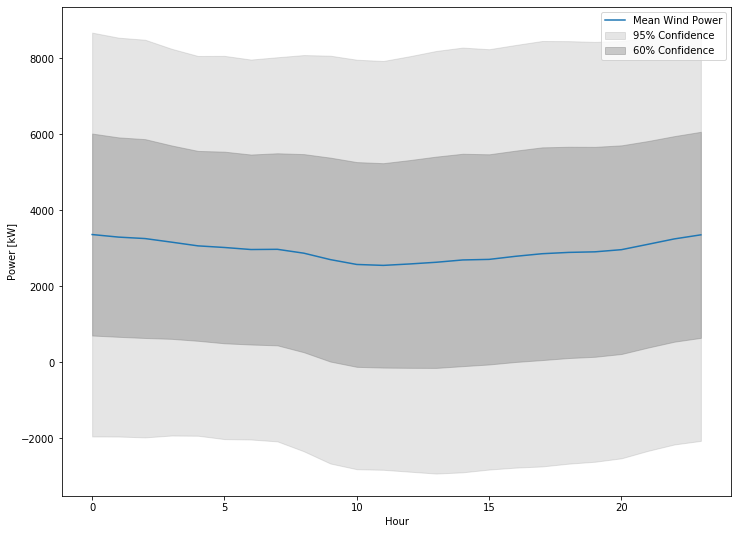

In [5]:
plt.figure(figsize=(12,9))
plt.plot(range(24), avg_hourly, label='Mean Wind Power')
plt.fill_between(range(24),
                 avg_hourly + 2 * std_hourly,
                 avg_hourly - 2 * std_hourly,
                 color='gray', alpha=0.2, label='95% Confidence')
plt.fill_between(range(24),
                 avg_hourly + std_hourly,
                 avg_hourly - std_hourly,
                 color='gray', alpha=0.4
                 , label='60% Confidence')
plt.legend()
plt.xlabel('Hour')
plt.ylabel('Power [kW]')
plt.show()

As expected, the uncertainty is huge. Wind can take on any value at any time and is difficult to predict. So let's just use the average value to generate our "profile."

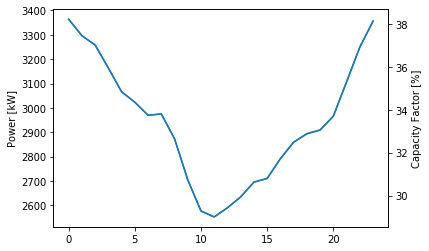

In [6]:
fig, ax = plt.subplots()
fig.figsize=(12,9)
ax.plot(range(24), avg_hourly, label='Mean Wind Power')
ax2 = ax.twinx()
ax2.plot(range(24), avg_hourly/railsplitter_df.kw.max()*100)
plt.xlabel('Hour')
ax.set_ylabel('Power [kW]')
ax2.set_ylabel('Capacity Factor [%]')
plt.show()

In [7]:
avg_hourly.mean()/railsplitter_df.kw.max()

0.33419726781705955

In [8]:
for i, v in enumerate(avg_hourly):
    print(f"Hour {i+1} : {v/railsplitter_df.kw.max()} CF")

Hour 1 : 0.38227249345304903 CF
Hour 2 : 0.37459315375982044 CF
Hour 3 : 0.3702438739244295 CF
Hour 4 : 0.3595085110362888 CF
Hour 5 : 0.34840114104002995 CF
Hour 6 : 0.3435524223718668 CF
Hour 7 : 0.3374490273101384 CF
Hour 8 : 0.33808408155630376 CF
Hour 9 : 0.3265116442199775 CF
Hour 10 : 0.3073070987654321 CF
Hour 11 : 0.29277169846614287 CF
Hour 12 : 0.2900102880658436 CF
Hour 13 : 0.29428544706322485 CF
Hour 14 : 0.29935839880284326 CF
Hour 15 : 0.30625023381967825 CF
Hour 16 : 0.30796530115974563 CF
Hour 17 : 0.31718691545080435 CF
Hour 18 : 0.3248978208005986 CF
Hour 19 : 0.3288388514777404 CF
Hour 20 : 0.33058057426112986 CF
Hour 21 : 0.3370276842499064 CF
Hour 22 : 0.3530235222596334 CF
Hour 23 : 0.3692361111111111 CF
Hour 24 : 0.38137813318368874 CF


## Seasonal Differences in Average Capacity Factor 

In [9]:
railsplitter_df

,MWh,kw
time,,
2016-11-01 01:00:00,7.3,7300
2016-11-01 02:00:00,7.6,7600
2016-11-01 03:00:00,6.5,6500
2016-11-01 04:00:00,7.4,7400
2016-11-01 05:00:00,7.9,7900
...,...,...
2019-06-30 19:00:00,2.1,2100
2019-06-30 20:00:00,1.4,1400
2019-06-30 21:00:00,2.2,2200


In [10]:
spring_mask = (railsplitter_df.index.month >= 3) & (railsplitter_df.index.month <= 5) 
summer_mask = (railsplitter_df.index.month >= 6) & (railsplitter_df.index.month <= 8)
fall_mask = (railsplitter_df.index.month >= 9) & (railsplitter_df.index.month <= 11) 
winter_mask = (railsplitter_df.index.month == 12) | (railsplitter_df.index.month == 1) | (railsplitter_df.index.month == 2) 
seasons = {'spring':spring_mask,
           'summer':summer_mask,
           'fall':fall_mask,
           'winter':winter_mask}
seasonal_hourly_profile = {}

In [11]:
for season in seasons:
    mask = seasons[season]
    df = railsplitter_df[mask]
    hours_grouped = df.groupby(df.index.hour)
    
    avg_hourly = np.zeros(len(hours_grouped))
    std_hourly = np.zeros(len(hours_grouped))
    for i, hour in enumerate(hours_grouped.groups):
        hour_data = hours_grouped.get_group(hour)
        avg_hourly[i] = hour_data.kw.mean()
        std_hourly[i] = hour_data.kw.std()
        
    seasonal_hourly_profile[season] = avg_hourly
    colname = season+"_cf"
    seasonal_hourly_profile[colname] = avg_hourly/railsplitter_df.kw.max()

In [12]:
seasonal_df = pd.DataFrame(seasonal_hourly_profile)
seasonal_df

,spring,spring_cf,summer,summer_cf,fall,fall_cf,winter,winter_cf
0,3640.579710,0.413702,2164.485981,0.245964,3570.436019,0.405731,3868.797048,0.439636
1,3679.347826,0.418108,2146.261682,0.243893,3459.141509,0.393084,3688.822222,0.419184
2,3724.637681,0.423254,2054.672897,0.233486,3359.613208,0.381774,3655.481481,0.415396
3,3490.217391,0.396616,2060.747664,0.234176,3255.198113,0.369909,3632.185185,0.412748
4,3353.985507,0.381135,1965.887850,0.223396,3223.377358,0.366293,3519.733333,0.399970
5,3373.550725,0.383358,1956.542056,0.222334,3114.056604,0.353870,3439.370370,0.390838
6,3346.739130,0.380311,1861.214953,0.211502,3081.849057,0.350210,3374.266667,0.383439
7,3488.405797,0.396410,1764.485981,0.200510,2964.179245,0.336839,3418.629630,0.388481
8,3377.898551,0.383852,1432.710280,0.162808,2922.169811,0.332065,3460.925926,0.393287
9,3160.507246,0.359149,1190.654206,0.135302,2620.028302,0.297730,3503.837037,0.398163


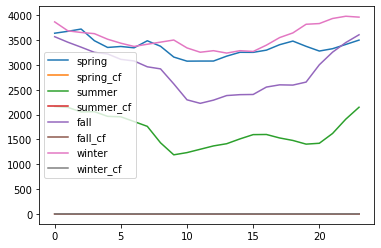

In [13]:
seasonal_df.plot()